#  Neural Network using Back Propagation

### By Ranjit Singh Bisht

### Import Libraries

In [190]:
from math import exp
from random import seed
from random import random
import numpy as np
import random

### Initialize a network

In [225]:

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random.random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    #random.uniform(-0.3, 0.6) 
    network.append(hidden_layer)
    output_layer = [{'weights':[random.random()  for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

### Calculating Weighted Sum

In [91]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation


### Activation Function

In [168]:

# Transfer neuron activation
def transfer(activation):
    return np.maximum(0, activation)
#     return 1.0 / (1.0 + exp(-activation))

### Forward propagation

In [165]:


# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
#         print(inputs)
        inputs = new_inputs
    return inputs

### Transfer Derivative

In [169]:

# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return np.int64(output > 0)

#     return  output * (1.0 - output)

### Backpropagate error and store in neurons

In [144]:

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(neuron['output'] - expected[j])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
#             print(f"{neuron['delta']} for {neuron['output']}")


### Update network weights with error

In [97]:

# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] -= l_rate * neuron['delta']

### Train a network

In [234]:

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    SSE=[]
    for epoch in range(n_epoch):
        
       
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [row[i] for i in range(2,4)]
            print(f"output is {outputs}")
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
#             print(f"error is {sum_error}")
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        SSE.append(sum_error)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return SSE




In [250]:
# Test training backprop algorithm
seed(1)
dataset = [[0.3,0.6,0.7,0.4]]
n_inputs =2
n_outputs = 2
network = initialize_network(n_inputs, 2, n_outputs)

SSE=train_network(network, dataset, 0.15, 2, n_outputs)
for layer in network:
	print(layer)

output is [1.598438622367977, 1.1580370798830142]
>epoch=0, lrate=0.150, error=1.382
output is [0.7538754978298071, 0.4737990842572391]
>epoch=1, lrate=0.150, error=0.008
[{'weights': [0.10630414392647768, 0.7913135365653856, 0.6047673845897139], 'output': 1.1168173585985717, 'delta': 0.01665305082692433}, {'weights': [0.19056394651136757, 0.3664249286358327, 0.08396228249643145], 'output': 0.39042607645856153, 'delta': 0.09128574520068267}]
[{'weights': [0.4656815574633996, 0.6746191758729445, -0.04898753125543272], 'output': 0.7538754978298071, 'delta': 0.05387549782980716}, {'weights': [-0.13325910665568416, 0.7378324416780833, 0.3079916432840154], 'output': 0.4737990842572391, 'delta': 0.07379908425723908}]


### Predict using the neural network

In [258]:
row= [0.3,0.6,0.7,0.4]
outputs = forward_propagate(network, row)
print(outputs)

[0.7121210857972016, 0.4262287366832631]


### Generate a plot showing the sum of squared errors of the network changed during training when 𝛼 = 0.1

In [238]:
import matplotlib.pyplot as plt
dataset = [[0.3,0.6,0.7,0.4]]
n_inputs =2
n_outputs = 2
network = initialize_network(n_inputs, 2, n_outputs)
SSE=train_network(network, dataset, 0.1, 400, n_outputs)
# data to be plotted
x = np.arange(1, 401)
y = SSE
 


output is [0.6739473218128436, 1.9667843558876437]
>epoch=0, lrate=0.100, error=2.455
output is [0.511232201072013, 1.1644309448172998]
>epoch=1, lrate=0.100, error=0.620
output is [0.5148629413026969, 0.9023600271857826]
>epoch=2, lrate=0.100, error=0.287
output is [0.5403095997524869, 0.7587041853114209]
>epoch=3, lrate=0.100, error=0.154
output is [0.5685656425780854, 0.667101568405682]
>epoch=4, lrate=0.100, error=0.089
output is [0.5942929907682809, 0.6038291897282566]
>epoch=5, lrate=0.100, error=0.053
output is [0.6160557084874563, 0.5579415556914813]
>epoch=6, lrate=0.100, error=0.032
output is [0.633806900837697, 0.5235979374363054]
>epoch=7, lrate=0.100, error=0.020
output is [0.6479960029882262, 0.49735278448918646]
>epoch=8, lrate=0.100, error=0.012
output is [0.6592064590300881, 0.47701391205858473]
>epoch=9, lrate=0.100, error=0.008
output is [0.6680059153479425, 0.4611023396668842]
>epoch=10, lrate=0.100, error=0.005
output is [0.6748902501943675, 0.44857402373179095]
>e

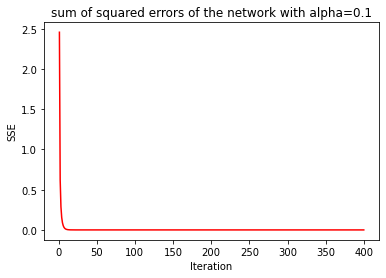

In [240]:
# plotting
plt.title("sum of squared errors of the network with alpha=0.1")
plt.xlabel("Iteration")
plt.ylabel("SSE")
plt.plot(x, y, color ="red")
plt.show()

### Generate a plot showing the sum of squared errors of the network changed during training when 𝛼 = 0.2

In [241]:
import matplotlib.pyplot as plt
dataset = [[0.3,0.6,0.7,0.4]]
n_inputs =2
n_outputs = 2
network = initialize_network(n_inputs, 2, n_outputs)
SSE=train_network(network, dataset, 0.2, 400, n_outputs)
# data to be plotted
x = np.arange(1, 401)
y = SSE
 


output is [0.49020603524877343, 0.42019063349018804]
>epoch=0, lrate=0.200, error=0.044
output is [0.5748678273519212, 0.42596802208197315]
>epoch=1, lrate=0.200, error=0.016
output is [0.6263016233358163, 0.423264092971143]
>epoch=2, lrate=0.200, error=0.006
output is [0.6566581110404985, 0.41793357704448286]
>epoch=3, lrate=0.200, error=0.002
output is [0.6743937178226528, 0.41275258397204195]
>epoch=4, lrate=0.200, error=0.001
output is [0.6847674229265993, 0.40864196854824]
>epoch=5, lrate=0.200, error=0.000
output is [0.690874178410235, 0.4056803802106963]
>epoch=6, lrate=0.200, error=0.000
output is [0.6944981840296496, 0.40365944793449793]
>epoch=7, lrate=0.200, error=0.000
output is [0.6966657322692206, 0.40232568751321834]
>epoch=8, lrate=0.200, error=0.000
output is [0.697971008907146, 0.4014642727554496]
>epoch=9, lrate=0.200, error=0.000
output is [0.6987614065899959, 0.40091592251406166]
>epoch=10, lrate=0.200, error=0.000
output is [0.6992421105272543, 0.40057030143695427

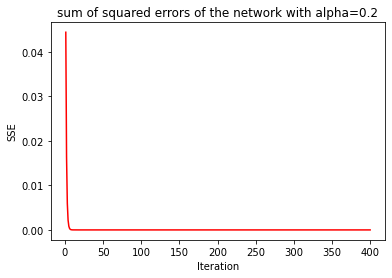

In [242]:
# plotting
plt.title("sum of squared errors of the network with alpha=0.2")
plt.xlabel("Iteration")
plt.ylabel("SSE")
plt.plot(x, y, color ="red")
plt.show()